In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score
from sklearn.inspection import permutation_importance
import shap
from sklearn.linear_model import LinearRegression, LogisticRegression


df = pd.read_csv('mental_health_clean.csv')
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [17]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

In [18]:
df.isnull().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1100
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1502
Sleep_Quality                           0
Region                                  0
dtype: int64

In [19]:
df = df.fillna("None")

In [20]:
df.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

In [21]:
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [23]:
df = df.drop('Employee_ID', axis=1)
df.info()

KeyError: "['Employee_ID'] not found in axis"

In [24]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

cat_df = df[cat_cols]
cat_df.head()

,Gender,Job_Role,Industry,Work_Location,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,Non-binary,HR,Healthcare,Hybrid,Medium,Depression,No,Decrease,Unsatisfied,Weekly,Good,Europe
1,Female,Data Scientist,IT,Remote,Medium,Anxiety,No,Increase,Satisfied,Weekly,Good,Asia
2,Non-binary,Software Engineer,Education,Hybrid,Medium,Anxiety,No,No Change,Unsatisfied,None,Poor,North America
3,Male,Software Engineer,Finance,Onsite,High,Depression,Yes,Increase,Unsatisfied,None,Poor,Europe
4,Male,Sales,Consulting,Onsite,High,None,Yes,Decrease,Unsatisfied,Weekly,Average,North America


In [25]:
for col in cat_df.columns:
    print(f'{col}: \n{cat_df[col].unique()}')

Gender: 
['Non-binary' 'Female' 'Male' 'Prefer not to say']
Job_Role: 
['HR' 'Data Scientist' 'Software Engineer' 'Sales' 'Marketing' 'Designer'
 'Project Manager']
Industry: 
['Healthcare' 'IT' 'Education' 'Finance' 'Consulting' 'Manufacturing'
 'Retail']
Work_Location: 
['Hybrid' 'Remote' 'Onsite']
Stress_Level: 
['Medium' 'High' 'Low']
Mental_Health_Condition: 
['Depression' 'Anxiety' 'None' 'Burnout']
Access_to_Mental_Health_Resources: 
['No' 'Yes']
Productivity_Change: 
['Decrease' 'Increase' 'No Change']
Satisfaction_with_Remote_Work: 
['Unsatisfied' 'Satisfied' 'Neutral']
Physical_Activity: 
['Weekly' 'None' 'Daily']
Sleep_Quality: 
['Good' 'Poor' 'Average']
Region: 
['Europe' 'Asia' 'North America' 'South America' 'Oceania' 'Africa']


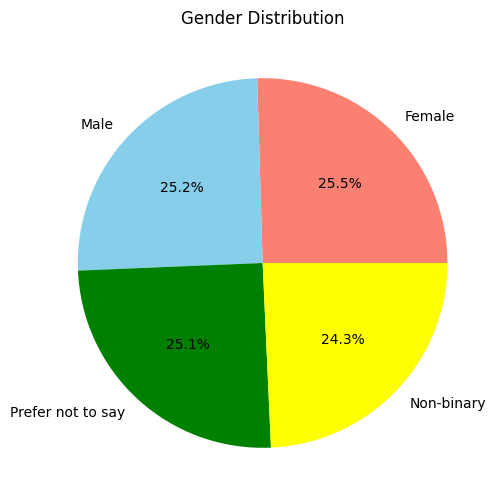

In [29]:
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['salmon', 'skyblue', 'green', 'yellow'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

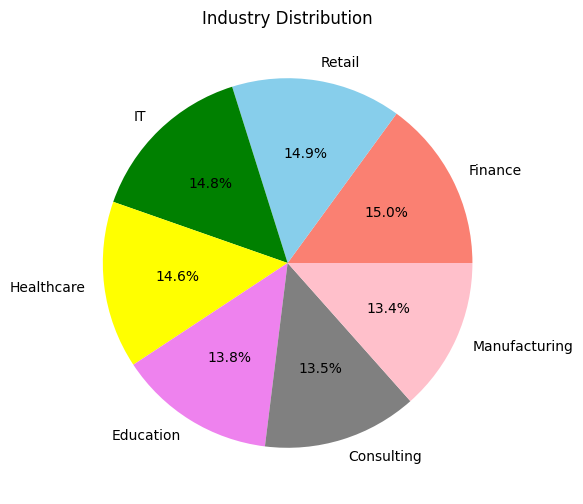

In [34]:
plt.figure(figsize=(6, 6))
df['Industry'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['salmon', 'skyblue', 'green', 'yellow', 'violet', 'grey', 'pink'])
plt.title('Industry Distribution')
plt.ylabel('')
plt.show()

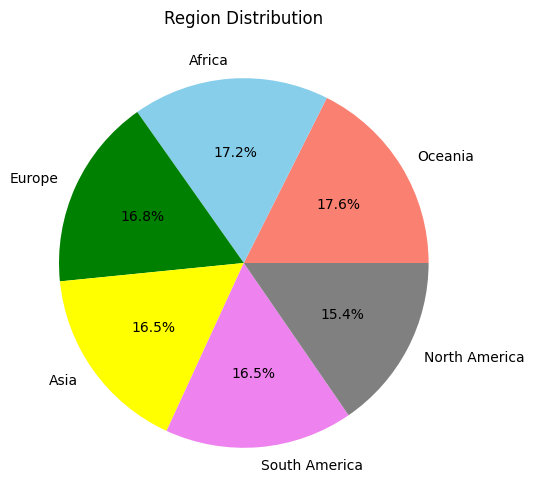

In [35]:
plt.figure(figsize=(6, 6))
df['Region'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=['salmon', 'skyblue', 'green', 'yellow', 'violet', 'grey', 'pink'])
plt.title('Region Distribution')
plt.ylabel('')
plt.show()

In [ ]:
# Cross-validation
cv_mine = KFold(n_splits=3)

# Grid search
gridSearch = GridSearchCV(pipeline, param_grid, cv=cv_mine,
                          scoring='r2', n_jobs=-1)

# Fit the model
gridSearch.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Stress_Level',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', '...
       'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression',
       'Mental_Health_Condition_None', 'Region_Asia', 'Region_Europe',
       'Region_North America', 'Region_Oceania', 'Region_South America'],
      dtype='object'))])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [RandomForestRegressor()],
                          'regressor__max_depth': [1, 2, 3, 4],
                          'regressor__n_estimators': [100, 500]}],
             scoring='r2')

In [ ]:
# Cross-validation
cv_mine = KFold(n_splits=3)

# Grid search
gridSearch = GridSearchCV(pipeline, param_grid, cv=cv_mine,
                          scoring='r2', n_jobs=-1)

# Fit the model
gridSearch.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Stress_Level',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', '...
       'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression',
       'Mental_Health_Condition_None', 'Region_Asia', 'Region_Europe',
       'Region_North America', 'Region_Oceania', 'Region_South America'],
      dtype='object'))])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [RandomForestRegressor()],
                          'regressor__max_depth': [1, 2, 3, 4],
                          'regressor__n_estimators': [100, 500]}],
             scoring='r2')

In [38]:
df2 = pd.read_csv('MH_encoded.csv')
df2.head()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,...,Work_Location_Onsite,Work_Location_Remote,Mental_Health_Condition_Burnout,Mental_Health_Condition_Depression,Mental_Health_Condition_None,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,32,13,47,7,2,1.0,0,0.0,1,0.0,...,False,False,False,True,False,False,True,False,False,False
1,40,3,52,4,1,1.0,0,2.0,3,2.0,...,False,True,False,False,False,True,False,False,False,False
2,59,22,46,11,5,1.0,0,1.0,4,0.0,...,False,False,False,False,False,False,False,True,False,False
3,27,20,32,8,4,2.0,1,2.0,3,0.0,...,True,False,False,True,False,False,True,False,False,False
4,49,32,35,12,2,2.0,1,0.0,3,0.0,...,True,False,False,False,True,False,False,True,False,False


In [39]:
df.columns

Index(['Age', 'Gender', 'Job_Role', 'Industry', 'Years_of_Experience',
       'Work_Location', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Work_Life_Balance_Rating', 'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

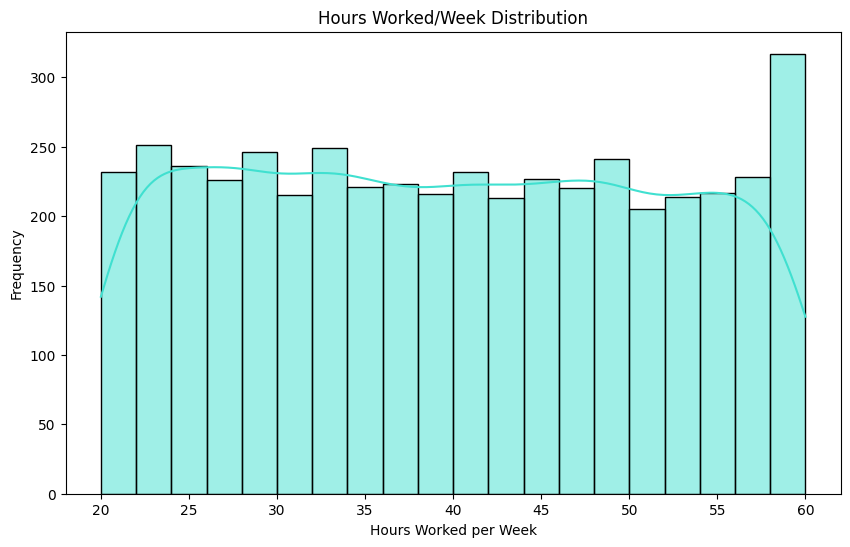

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Hours_Worked_Per_Week'],
             bins=20, kde=True, color='turquoise')
plt.title('Hours Worked/Week Distribution')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Frequency')
plt.show()

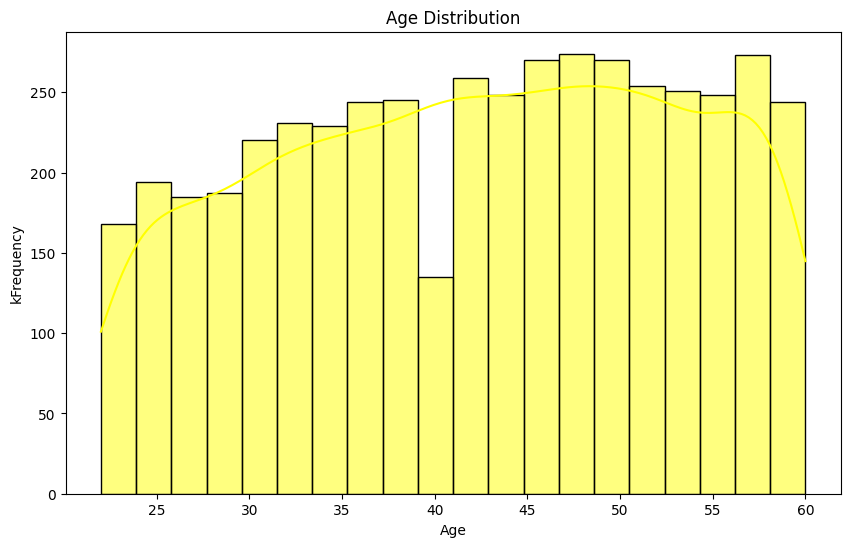

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Age'],
             bins=20, kde=True, color='yellow')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('kFrequency')
plt.show()

In [ ]:
# Cross-validation
cv_mine = KFold(n_splits=3)

# Grid search
gridSearch = GridSearchCV(pipeline, param_grid, cv=cv_mine,
                          scoring='r2', n_jobs=-1)

# Fit the model
gridSearch.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Stress_Level',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', '...
       'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression',
       'Mental_Health_Condition_None', 'Region_Asia', 'Region_Europe',
       'Region_North America', 'Region_Oceania', 'Region_South America'],
      dtype='object'))])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [RandomForestRegressor()],
                          'regressor__max_depth': [1, 2, 3, 4],
                          'regressor__n_estimators': [100, 500]}],
             scoring='r2')

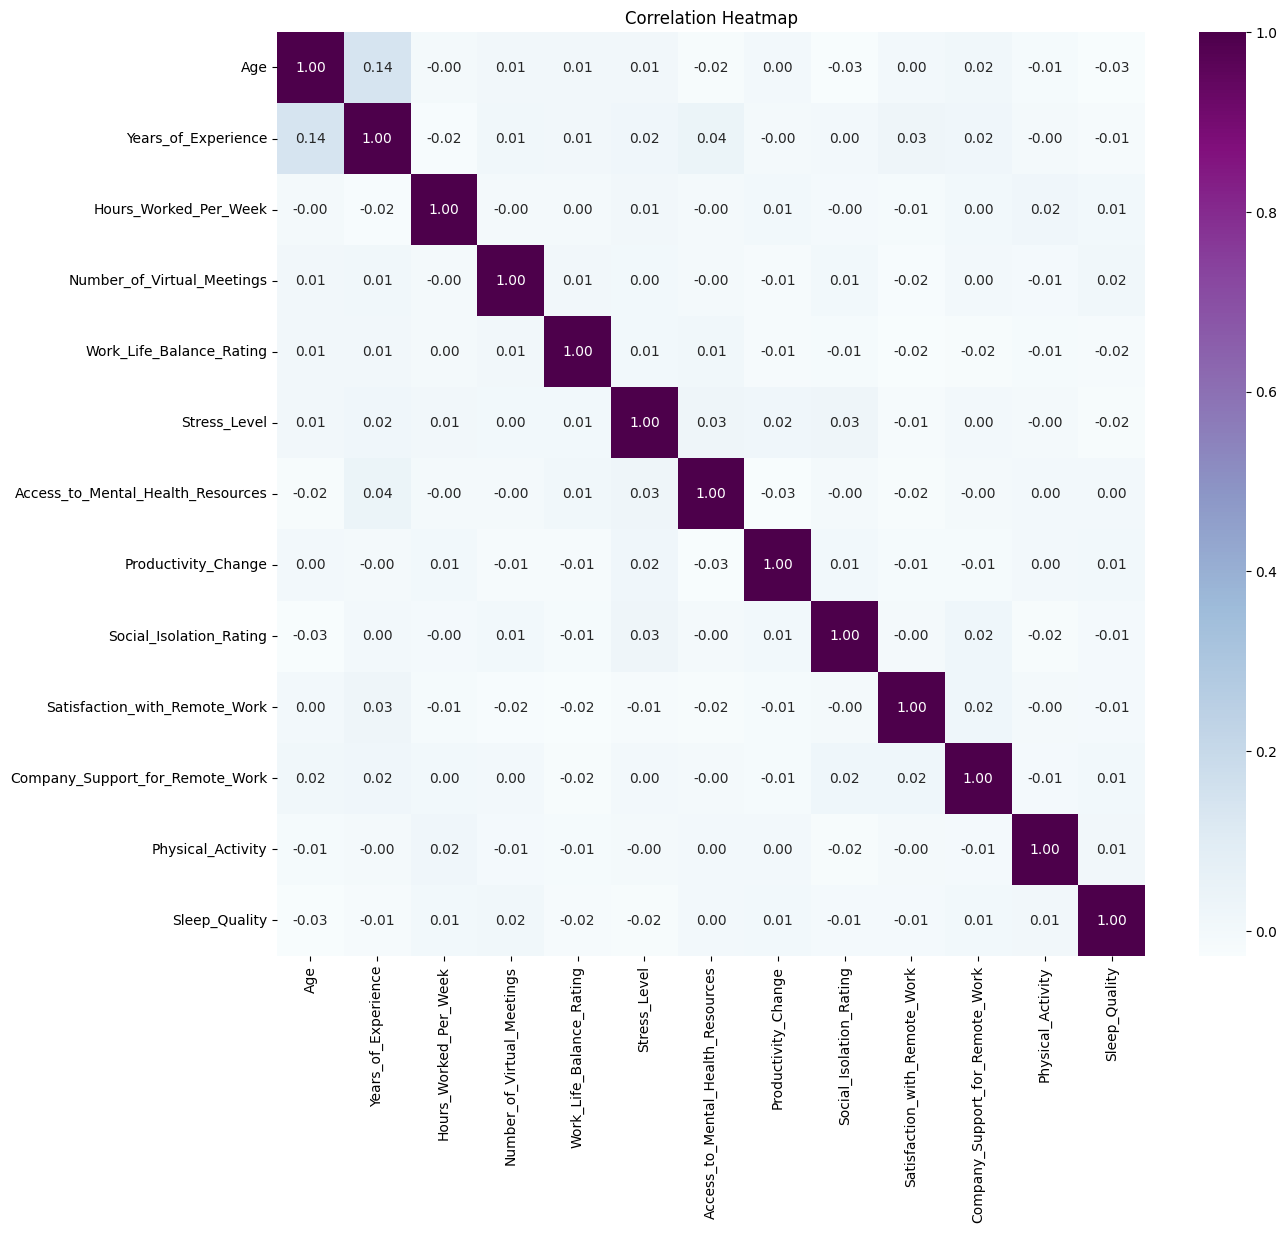

In [49]:
plt.figure(figsize=(14, 12))
numeric_cols = df2.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='BuPu')
plt.title('Correlation Heatmap')
plt.show()

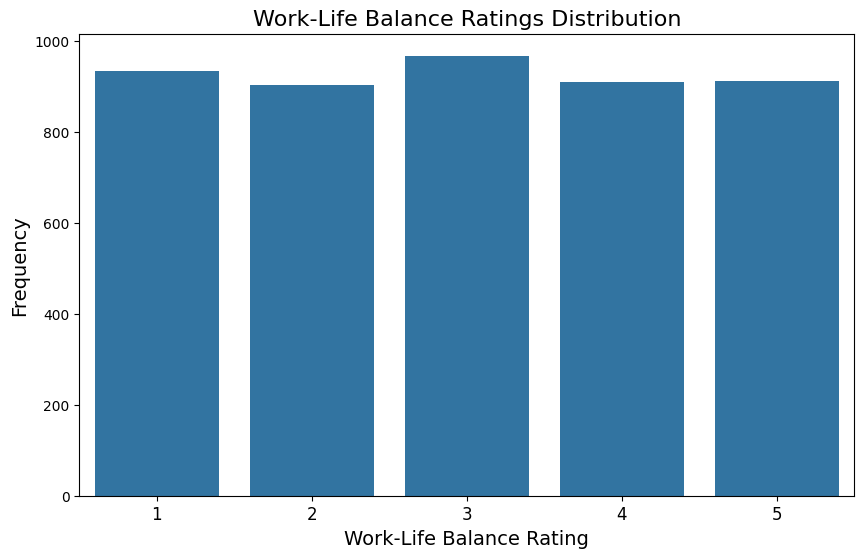

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=df['Work_Life_Balance_Rating'].value_counts().index,  # Unique ratings
    # Corresponding frequencies
    y=df['Work_Life_Balance_Rating'].value_counts().values
)
plt.title('Work-Life Balance Ratings Distribution', fontsize=16)
plt.xlabel('Work-Life Balance Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.show()

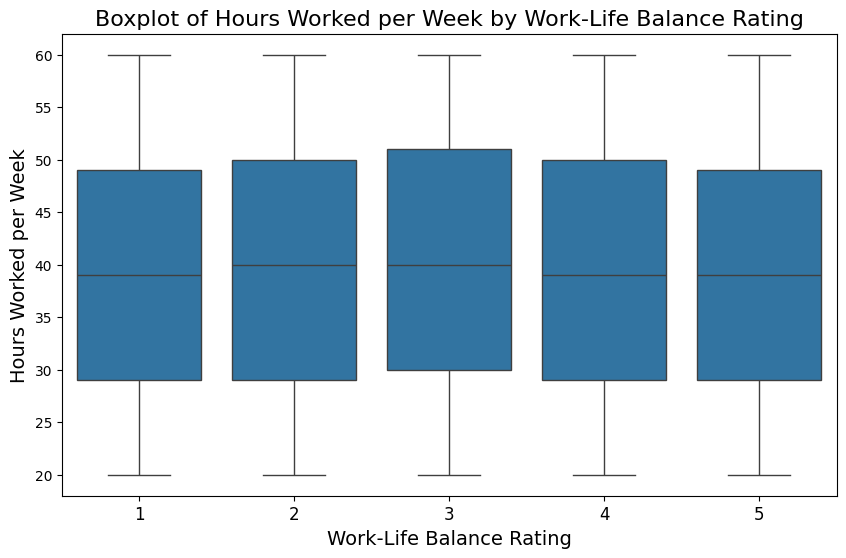

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Work_Life_Balance_Rating',
    y='Hours_Worked_Per_Week',  # Replace with the relevant numerical variable
    data=df
)
plt.title('Boxplot of Hours Worked per Week by Work-Life Balance Rating', fontsize=16)
plt.xlabel('Work-Life Balance Rating', fontsize=14)
plt.ylabel('Hours Worked per Week', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.show()

In [ ]:
# Cross-validation
cv_mine = KFold(n_splits=3)

# Grid search
gridSearch = GridSearchCV(pipeline, param_grid, cv=cv_mine,
                          scoring='r2', n_jobs=-1)

# Fit the model
gridSearch.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Stress_Level',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', '...
       'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression',
       'Mental_Health_Condition_None', 'Region_Asia', 'Region_Europe',
       'Region_North America', 'Region_Oceania', 'Region_South America'],
      dtype='object'))])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [RandomForestRegressor()],
                          'regressor__max_depth': [1, 2, 3, 4],
                          'regressor__n_estimators': [100, 500]}],
             scoring='r2')